In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

## Step 1 - Climate Analysis and Exploration

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Precipitation Analysis

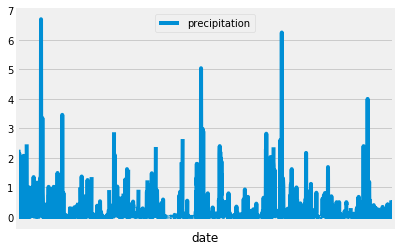

In [10]:
import re
# Design a query to retrieve the last 12 months of precipitation data and plot the results
Max_Date_Raw = session.query(func.max(Measurement.date)).scalar()
temp=re.split("-",Max_Date_Raw)
Max_Date_Clean = dt.date(int(temp[0]),int(temp[1]),int(temp[2]))
# Calculate the date 1 year ago from the last data point in the database
Year_Date=Max_Date_Clean - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
Precip_Raw= [Measurement.date, Measurement.prcp]
Precip_Clean = session.query(*Precip_Raw).filter(Measurement.date <= Max_Date_Clean).filter(Measurement.date >= Year_Date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
Precip_df = pd.DataFrame(Precip_Clean)
Precip_df.columns= ["date","precipitation"]
# Sort the dataframe by date
Precip_df=Precip_df.sort_values(by="date")
# Use Pandas Plotting with Matplotlib to plot the data
Precip_df.plot(x="date",y="precipitation")
plt.xlabel("date")
plt.xticks([])
plt.legend(loc="upper center")
plt.savefig("./Images/Yearly Precipitation.png")
plt.show()

![precipitation](Images/precipitation.png)

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
Precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

## Station Analysis

In [12]:
# Design a query to show how many stations are available in this dataset?
session.query(Station).group_by(Station.station).count()

9

In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station_high= session.query(func.max(Measurement.tobs)).all()
print("Highest recorded Station temp: "+str(station_high[0]))
station_low = session.query(func.min(Measurement.tobs)).all()
print("Lowest recorded Station temp: "+str(station_low[0]))
station_avg = session.query(func.avg(Measurement.tobs)).all()
print("Average recorded Station temp: "+str(station_avg[0]))

Highest recorded Station temp: (87.0,)
Lowest recorded Station temp: (53.0,)
Average recorded Station temp: (73.09795396419437,)


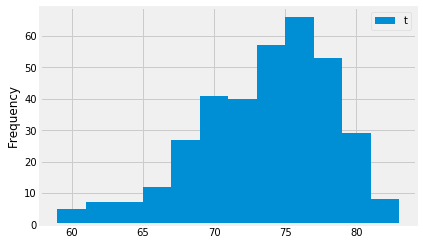

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == active_stations[0][0]).filter(Measurement.date >= Year_Date).all()

USC00519281_df = pd.DataFrame(temp_results)
plt.hist(USC00519281_df["tobs"], bins=12)
plt.ylabel("Frequency")
plt.legend("tobs")
#unsure why it isn't writing it as tobs and instead as t
plt.savefig("./Images/Histogram.png")
plt.show()


![precipitation](Images/station-histogram.png)

## Step 2 - Climate App

In [32]:
# Design a Flask API based on the queries that you have just developed
# Use Flask to create your routes per instructions


## Optional: Other Recommended Analyses

In [17]:
#The following are optional challenge queries. 
#These are highly recommended to attempt, but not required for the homework.

## Temperature Analysis

In [18]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [19]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [20]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [21]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Daily Rainfall Average

In [22]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [23]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [24]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [25]:
# Plot the daily normals as an area plot with `stacked=False`
